In [ ]:
##LINEAR REGRESSION - usar cuando??
#predice la respuesta de Y basado en el predictor x (features)
# Y ≈ ɒ + ß X + ℇ
#ɒ + ß son constantes desconocidas que representan la intercepcion y slope en el modelo linear
# ℇ estimacion de error

#queremos ver el ranking de nuestros features, aquellos con correlacion a nuestro output seran mejor calificado y viceversa,
#mientras mas cerca a 0 son variables no correlacionadas

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualizacion libraries 
import seaborn as sns
%matplotlib inline

In [21]:
USAhousing = pd.read_csv("USA_Housing.csv")

In [26]:
#USAhousing.head()
#USAhousing.info()
#USAhousing.describe()
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [27]:
####vamos a escoger precio como la variable dependiente que me gustaria predecir, 

In [29]:
#cambiamos el nombre de columnas
USAhousing.columns = ['Income', 'Age', 'No_rooms' , 'No_bedrooms' , 'Population' , 'Price' , 'Address']

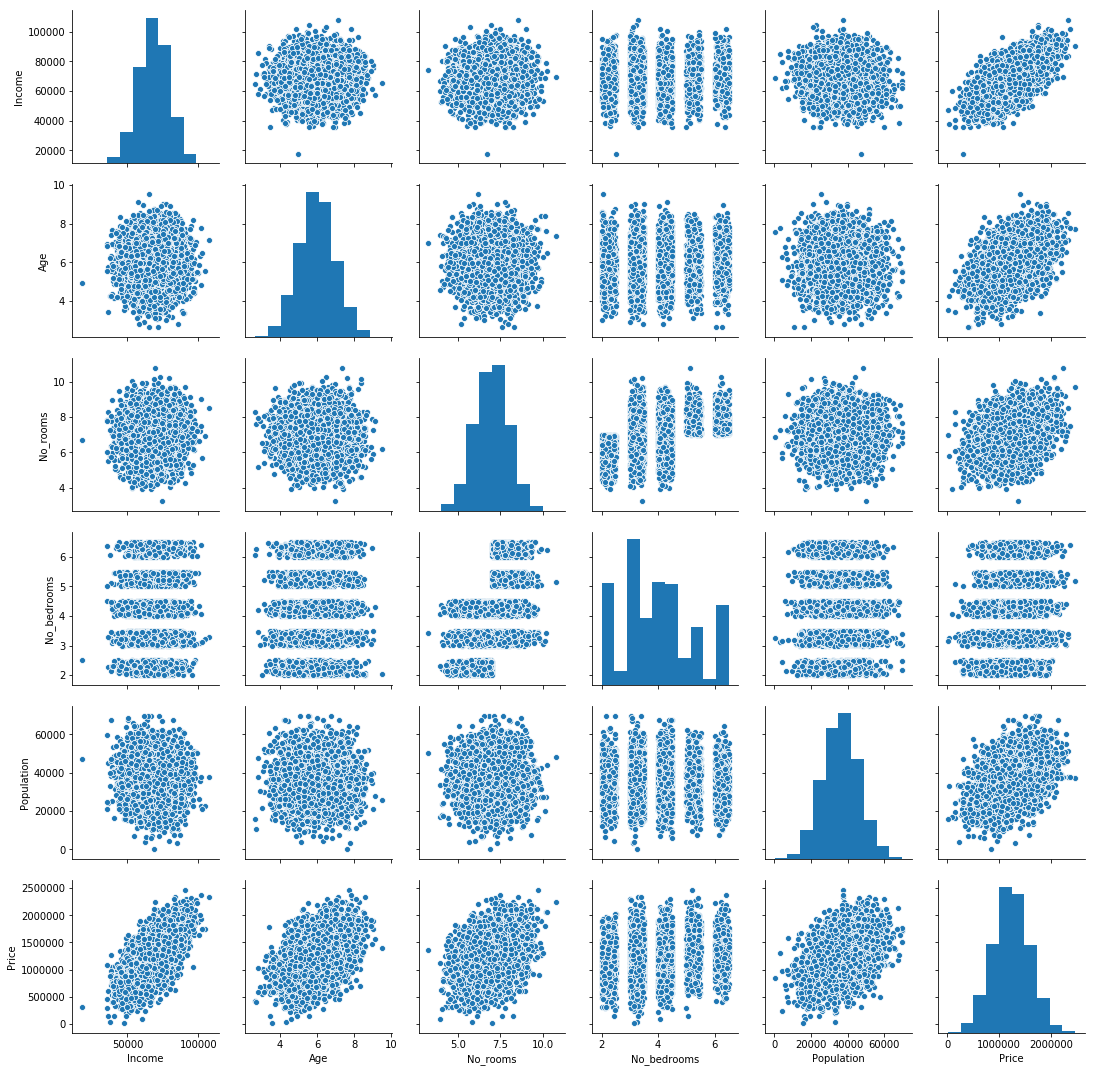

In [30]:
sns.pairplot(USAhousing)
#doss tipos de grafica una histograma y scatter
#que me dicen???
#histograma la distribucion de cada variable
#scatter la relacion entre variables

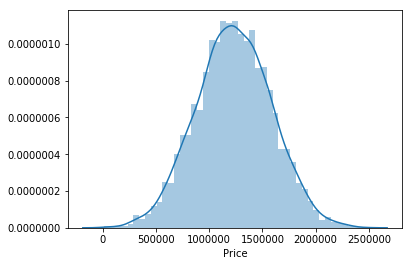

In [31]:
sns.distplot(USAhousing['Price'])
#siempre es bueno empezar axplorando como tus variables estan distribuidas

In [32]:
###CORELACION
#es un indice que varia de -1 a 1, cuando el valor es cerca de 0 no hay relacion entre las variables
USAhousing.corr()

,Income,Age,No_rooms,No_bedrooms,Population,Price
Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
No_rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
No_bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


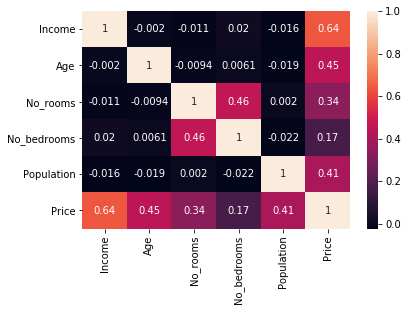

In [33]:
correlation_matrix = USAhousing.corr()
sns.heatmap(data=correlation_matrix, annot=True)
#el color negro representa que no hay relacion linear entre estas variables
#mientras mas claro mayor correlacion

In [34]:
###Determinacion de coeficientes R2
#es la fraccion del porcentaje de variacion en la respuesta a nuestra variable Y que puede ser explicada por nuestra variable X
#El rango va de 0 (no predecible) a 1 (100% completa prediccion)
#Una alta R2 indica que podemos predecir mejor nuestra variable con menor error
#####AHORA SI VAMOS A EMPEZAR A ENTRENAR eL MODELO

In [38]:
X = USAhousing[['Income', 'Age', 'No_rooms' , 'No_bedrooms' , 'Population']]
y = USAhousing['Price']

In [39]:
###dividir nuestra data train y test
#dividida 60-40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [41]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
predictions = lm.predict(X_test)

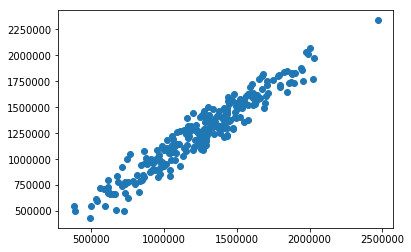

In [44]:
#modelo linear!!
plt.scatter(y_test,predictions)

In [46]:
print(lm.coef_)

[2.15869712e+01 1.65460686e+05 1.19941952e+05 2.39664955e+03
 1.51816883e+01]


In [58]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})   

In [59]:
df

,Actual,Predicted
1501,1.339096e+06,1.309192e+06
2586,1.251794e+06,1.238042e+06
2653,1.340095e+06,1.244696e+06
1055,1.431508e+06,1.230579e+06
705,1.042374e+06,1.059787e+06
106,1.555320e+06,1.542694e+06
589,1.250882e+06,1.096896e+06
2468,1.039381e+06,8.339413e+05
2413,8.324752e+05,7.905111e+05
1600,1.420648e+06,1.468874e+06


In [65]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient']) 
coeff_df
#que significa
#por cada unidad mas de income, hay un crecimiento de $21.5 en precio
#por cada unidad mas de x, hay un crecimiento o decrese si es negativo Y

,Coefficient
Income,21.586971
Age,165460.686208
No_rooms,119941.952059
No_bedrooms,2396.649546
Population,15.181688


In [67]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, predictions)

In [68]:
r2

0.9221102191897503